**DECISION TREE**

Objective:

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


**1. Data Preparation:**

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

In [ ]:
xls = pd.ExcelFile('heart_disease.xlsx')
print(xls.sheet_names)

['Description', 'Heart_disease']


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


**2. Exploratory Data Analysis (EDA):**

Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots, and correlation matrices


In [ ]:
df.shape

(908, 13)

In [ ]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


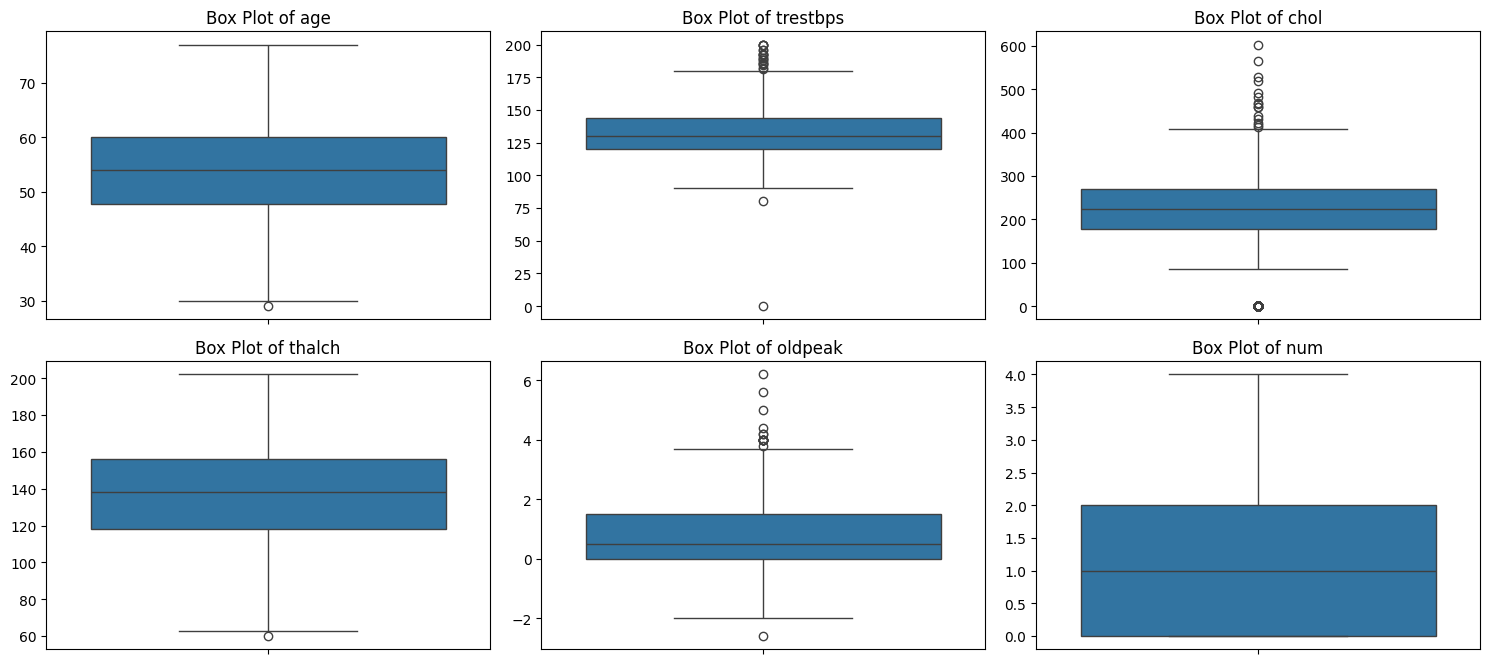

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed based on number of numerical columns
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

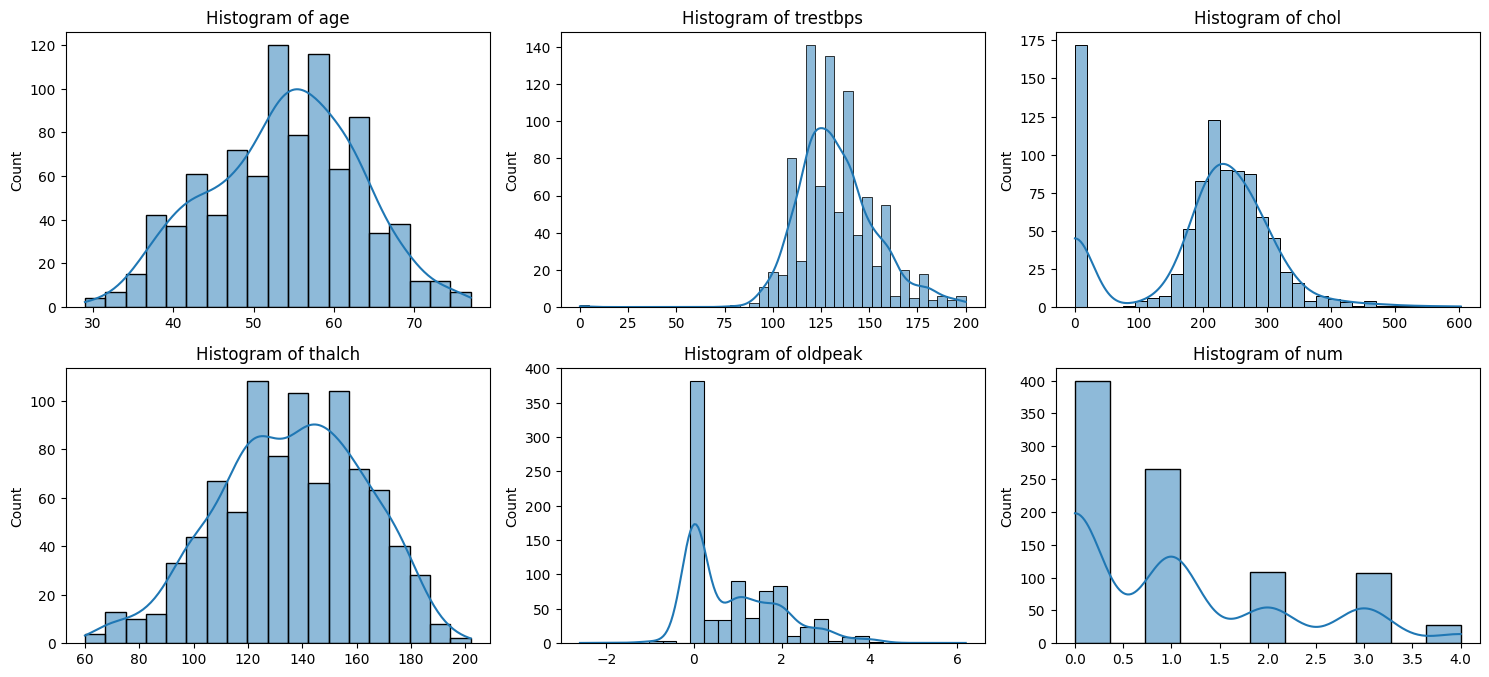

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 3, i + 1)
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f'Histogram of {col}')
  plt.xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Identified numerical columns:", numerical_cols)

Identified numerical columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']


In [ ]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    print(f"Outliers in '{col}' have been capped. Displaying the descriptive statistics to show the change:")
    display(df[col].describe())

Outliers in 'age' have been capped. Displaying the descriptive statistics to show the change:


,age
count,908.000000
mean,53.792263
std,9.156920
min,29.375000
25%,47.750000
50%,54.000000
75%,60.000000
max,77.000000


Outliers in 'trestbps' have been capped. Displaying the descriptive statistics to show the change:


,trestbps
count,908.000000
mean,133.283040
std,19.300452
min,84.000000
25%,120.000000
50%,130.000000
75%,144.000000
max,180.000000


Outliers in 'chol' have been capped. Displaying the descriptive statistics to show the change:


,chol
count,908.000000
mean,207.357517
std,96.873971
min,36.875000
25%,176.750000
50%,224.000000
75%,270.000000
max,409.875000


Outliers in 'thalch' have been capped. Displaying the descriptive statistics to show the change:


,thalch
count,908.000000
mean,135.958150
std,26.801825
min,61.000000
25%,118.000000
50%,138.000000
75%,156.000000
max,202.000000


Outliers in 'oldpeak' have been capped. Displaying the descriptive statistics to show the change:


,oldpeak
count,846.000000
mean,0.880851
std,1.056986
min,-2.250000
25%,0.000000
50%,0.500000
75%,1.500000
max,3.750000


Outliers in 'num' have been capped. Displaying the descriptive statistics to show the change:


,num
count,908.000000
mean,1.008811
std,1.144436
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


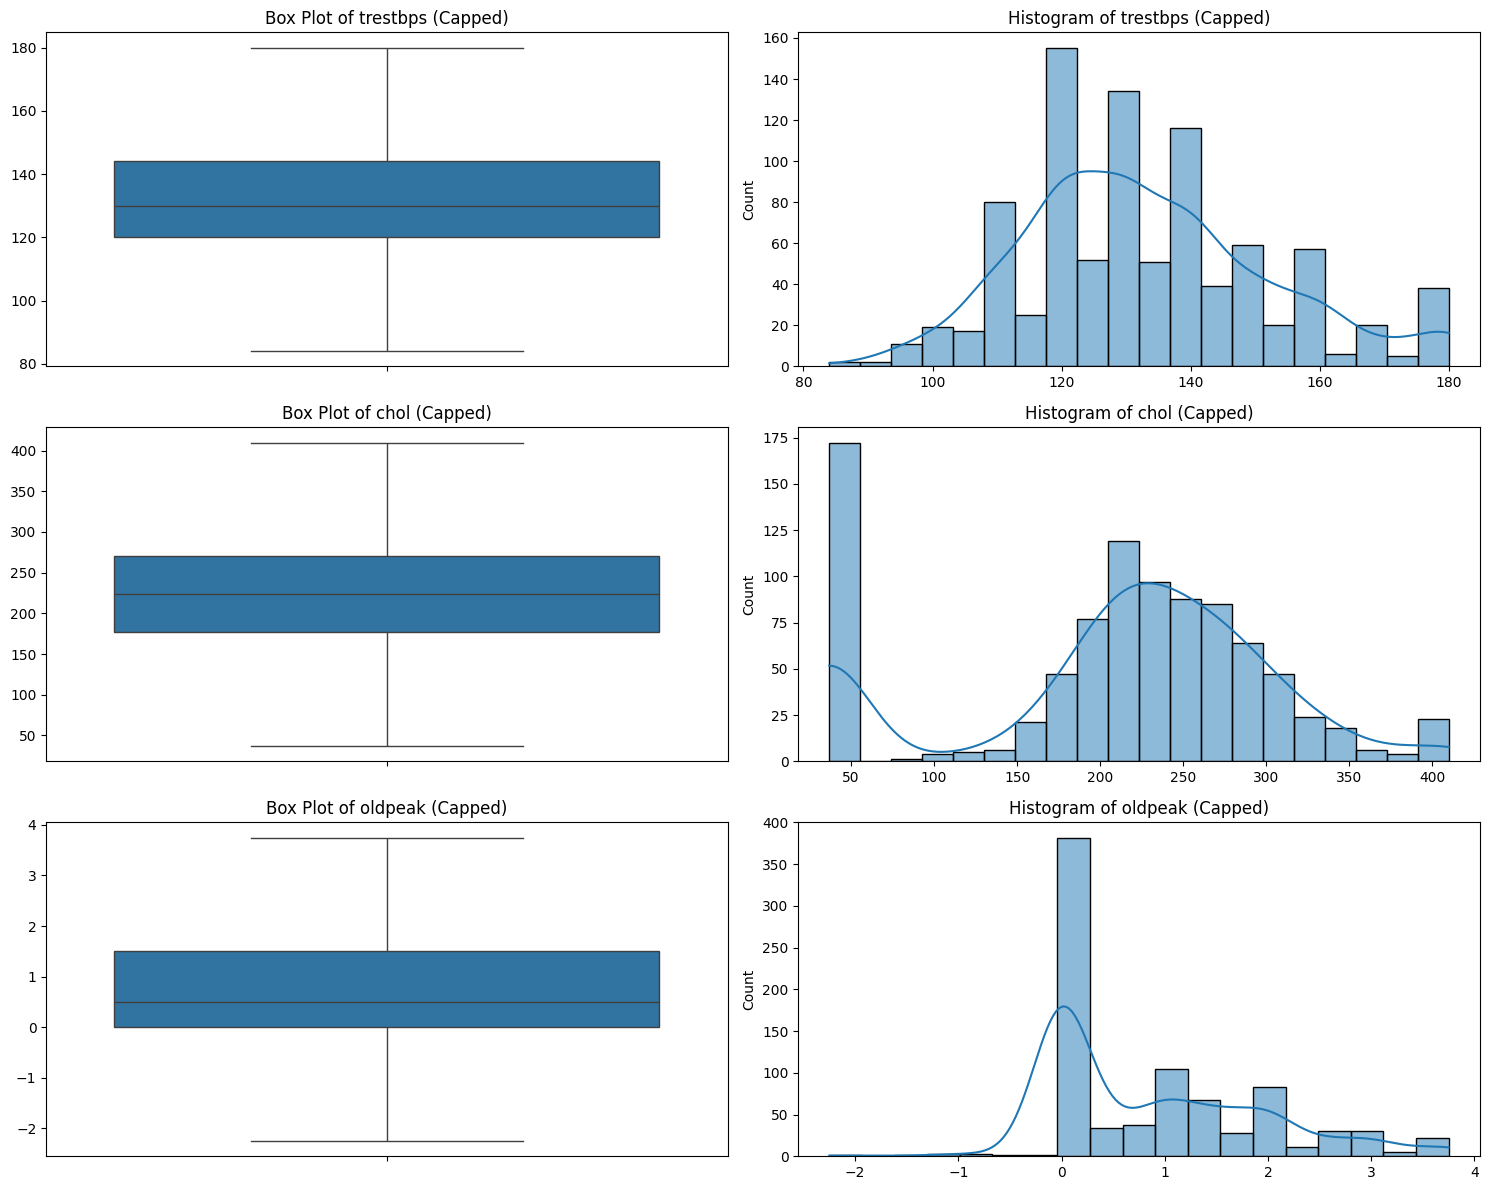

In [ ]:
selected_cols = ['trestbps', 'chol', 'oldpeak']

plt.figure(figsize=(15, 12))

for i, col in enumerate(selected_cols):
    plt.subplot(len(selected_cols), 2, 2 * i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} (Capped)')
    plt.ylabel('')

    plt.subplot(len(selected_cols), 2, 2 * i + 2)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col} (Capped)')
    plt.xlabel('')

plt.tight_layout()
plt.show()

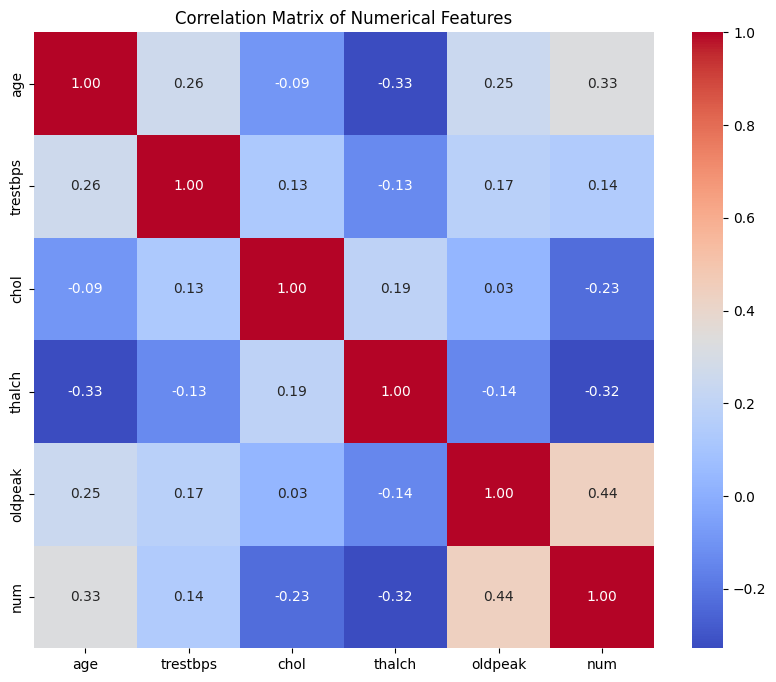

In [ ]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**3. Feature Engineering:**

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [ ]:
df['oldpeak'].isnull().sum()

np.int64(62)

In [ ]:
median_oldpeak = df['oldpeak'].median()
df['oldpeak'].fillna(median_oldpeak, inplace=True)
print(f"Missing values in 'oldpeak' after imputation: {df['oldpeak'].isnull().sum()}")

Missing values in 'oldpeak' after imputation: 0


/tmp/ipython-input-1555329736.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(median_oldpeak, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

print("LabelEncoder imported successfully.")

LabelEncoder imported successfully.


In [ ]:
label_encoder = LabelEncoder()

# Label Encode binary categorical columns
df['sex'] = label_encoder.fit_transform(df['sex'])
df['exang'] = label_encoder.fit_transform(df['exang'].astype(str).str.lower())
df['fbs'] = label_encoder.fit_transform(df['fbs'])

# One-Hot Encode multi-category nominal columns
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=False)

# Display the first few rows and data types to confirm changes
print("DataFrame after encoding:")
display(df.head())
display(df.dtypes)

DataFrame after encoding:


,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63.0,1,145.0,233.0,1,150.0,0,2.3,0.0,False,False,False,True,True,False,False,True,False,False,True,False,False
1,41.0,1,135.0,203.0,0,132.0,0,0.0,0.0,False,True,False,False,False,True,False,False,True,False,True,False,False
2,57.0,1,140.0,192.0,0,148.0,0,0.4,0.0,True,False,False,False,False,True,False,False,True,False,True,False,False
3,52.0,1,118.0,186.0,0,190.0,0,0.0,0.0,False,False,False,True,True,False,False,False,True,False,True,False,False
4,57.0,1,110.0,201.0,0,126.0,1,1.5,0.0,True,False,False,False,False,True,False,False,True,False,True,False,False


,0
age,float64
sex,int64
trestbps,float64
chol,float64
fbs,int64
thalch,float64
exang,int64
oldpeak,float64
num,float64
cp_asymptomatic,bool


In [ ]:
from sklearn.preprocessing import StandardScaler

print("StandardScaler imported successfully.")

StandardScaler imported successfully.


In [ ]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame after numerical scaling:")
display(df.head())
print("Descriptive statistics after numerical scaling:")
display(df[numerical_cols].describe())

DataFrame after numerical scaling:


,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.006104,1,0.607417,0.264845,1,0.524203,0,1.411045,-0.881977,False,False,False,True,True,False,False,True,False,False,True,False,False
1,-1.397775,1,0.089009,-0.045006,0,-0.147763,0,-0.834669,-0.881977,False,True,False,False,False,True,False,False,True,False,True,False,False
2,0.350500,1,0.348213,-0.158618,0,0.449540,0,-0.444110,-0.881977,True,False,False,False,False,True,False,False,True,False,True,False,False
3,-0.195836,1,-0.792285,-0.220589,0,2.017461,0,-0.834669,-0.881977,False,False,False,True,True,False,False,False,True,False,True,False,False
4,0.350500,1,-1.207012,-0.065663,0,-0.371752,1,0.629927,-0.881977,True,False,False,False,False,True,False,False,True,False,True,False,False


Descriptive statistics after numerical scaling:


,age,trestbps,chol,thalch,oldpeak,num
count,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02
mean,4.695216e-17,4.538709e-16,1.408565e-16,-3.130144e-16,-6.260288e-17,6.260288e-17
std,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00
min,-2.668006e+00,-2.554873e+00,-1.760808e+00,-2.798297e+00,-3.031564e+00,-8.819769e-01
25%,-6.602213e-01,-6.886036e-01,-3.161260e-01,-6.704039e-01,-8.346694e-01,-8.819769e-01
50%,2.269882e-02,-1.701954e-01,1.718899e-01,7.622524e-02,-3.464706e-01,-7.702855e-03
75%,6.783021e-01,5.555759e-01,6.469953e-01,7.481914e-01,6.299270e-01,8.665712e-01
max,2.535845e+00,2.421845e+00,2.091677e+00,2.465438e+00,2.826822e+00,2.615119e+00


**4. Decision Tree Classification:**

Split the dataset into training and testing sets (e.g., using an 80-20 split).

Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [ ]:
x=df.drop('num',axis=1)
y=df['num'].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
x = df.drop('num', axis=1)
y = df['num'].astype(int)

print("Shape of feature matrix x:", x.shape)
print("Shape of target vector y:", y.shape)

Shape of feature matrix x: (908, 21)
Shape of target vector y: (908,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (726, 21)
Shape of x_test: (182, 21)
Shape of y_train: (726,)
Shape of y_test: (182,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)



In [ ]:
y_pred


array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0])

In [ ]:
y_pred_proba = dt_classifier.predict_proba(x_test)


In [ ]:
#roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba,multi_class='ovr',average='macro')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.5345103029279427


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       159
           1       0.11      0.12      0.11        17
           2       0.17      0.17      0.17         6

    accuracy                           0.78       182
   macro avg       0.39      0.39      0.39       182
weighted avg       0.78      0.78      0.78       182

Confusion Matrix:
[[139  15   5]
 [ 15   2   0]
 [  4   1   1]]


**5. Hyperparameter Tuning:**

Perform hyperparameter tuning to optimize the Decision Tree model.


Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion


In [ ]:
from sklearn.model_selection import GridSearchCV

print("GridSearchCV imported successfully.")

GridSearchCV imported successfully.


In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_classifier_tuned = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_classifier_tuned, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train.astype(int))

print("Best parameters found:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Best score: 0.8388285309400094


In [ ]:
best_dt_classifier = grid_search.best_estimator_
print("Best Decision Tree Classifier parameters:")
print(best_dt_classifier.get_params())

Best Decision Tree Classifier parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_tuned = best_dt_classifier.predict(x_test)

print("Classification Report (Tuned Model):")
print(classification_report(y_test.astype(int), y_pred_tuned, zero_division=0))

print("Confusion Matrix (Tuned Model):")
print(confusion_matrix(y_test.astype(int), y_pred_tuned))

y_pred_proba_tuned = best_dt_classifier.predict_proba(x_test)


roc_auc_tuned = roc_auc_score(y_test.astype(int), y_pred_proba_tuned, multi_class='ovr', average='macro')
print(f"ROC-AUC Score (macro-average, One-vs-Rest, Tuned Model): {roc_auc_tuned:.2f}")

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       159
           1       0.17      0.12      0.14        17
           2       0.00      0.00      0.00         6

    accuracy                           0.83       182
   macro avg       0.35      0.35      0.35       182
weighted avg       0.78      0.83      0.80       182

Confusion Matrix (Tuned Model):
[[149  10   0]
 [ 15   2   0]
 [  6   0   0]]
ROC-AUC Score (macro-average, One-vs-Rest, Tuned Model): 0.65


**6. Model Evaluation and Analysis:**

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features


**Analysis:**

The tuned model shows an improvement in the ROC-AUC score, rising from 0.53 to 0.65, indicating better overall discriminative power.

For class 0, precision and recall improved, leading to a higher f1-score (0.91 vs 0.88). The accuracy also increased from 0.78 to 0.83.

However, performance for minority classes 1 and 2 remains challenging. While class 1 shows a slight improvement in precision and f1-score, its recall remains low. Class 2 performs extremely poorly, with 0.00 precision, recall, and f1-score, indicating the model completely failed to identify any instances of this class.

The macro average f1-score decreased slightly from 0.39 to 0.35, which is a concern and likely driven by the complete failure to predict class 2 after tuning, possibly due to the model focusing more on the majority class during optimization for accuracy.

## Visualize Decision Tree Structure

### Subtask:
Generate a visualization of the optimized (tuned) decision tree.


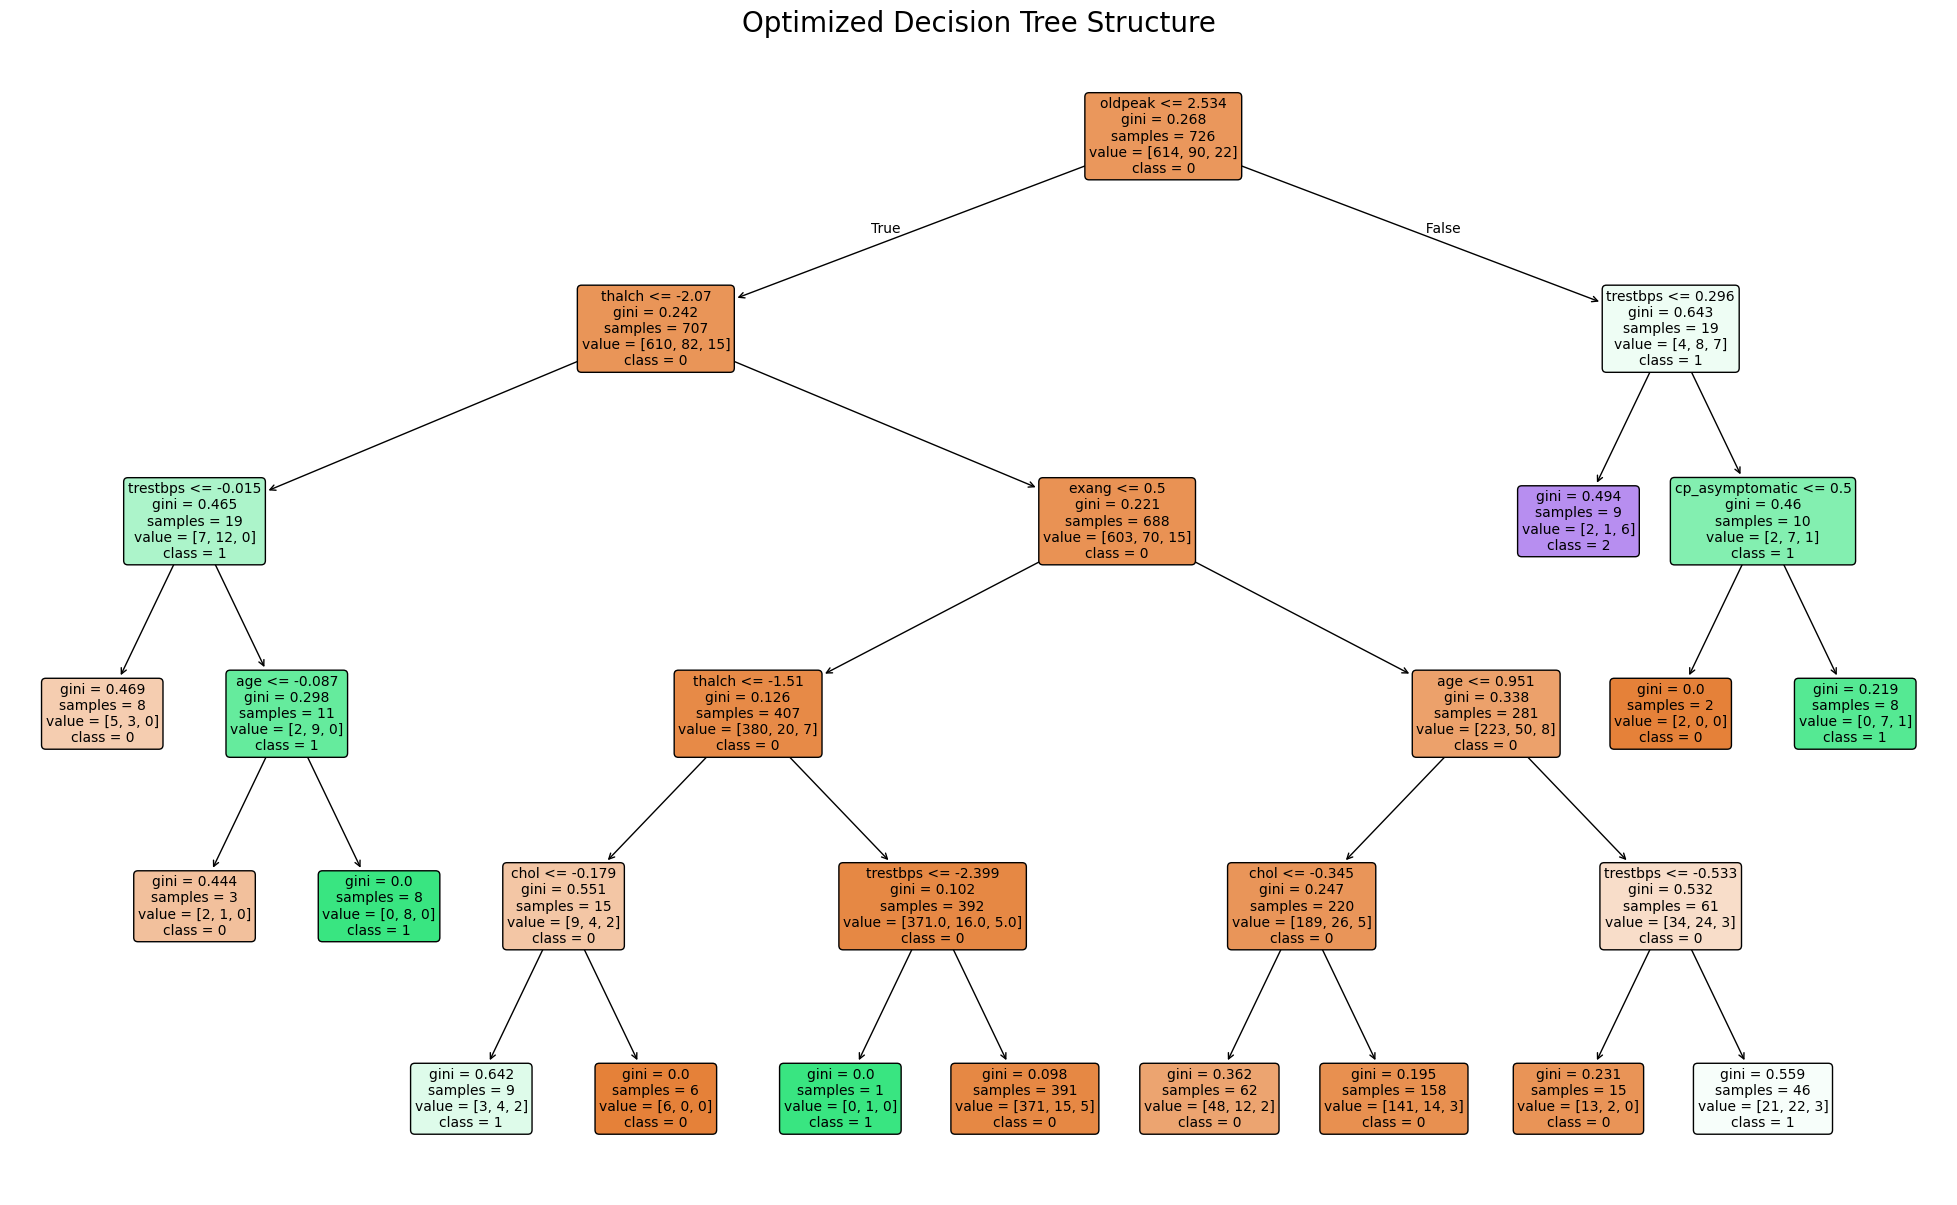

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 15))
plot_tree(best_dt_classifier,
          feature_names=x_train.columns.tolist(),
          class_names=[str(c) for c in sorted(y_train.unique())],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Optimized Decision Tree Structure', fontsize=20)
plt.savefig('optimized_decision_tree.png', dpi=300)
plt.show()